In [1]:
import kagglehub
import pandas as pd
path = kagglehub.dataset_download("fedesoriano/company-bankruptcy-prediction")
data = pd.read_csv(path + "/data.csv")
data

C:\Users\jsala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [2]:
print(data.isnull().sum().sum())

0


In [3]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0)
data_reduced = pd.DataFrame(selector.fit_transform(data),
                            columns=data.columns[selector.get_support(indices=True)])


In [4]:
data_reduced

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1.0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1.0,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1.0,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1.0,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1.0,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.0,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,0.029890
6815,0.0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.0,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,0.038284
6816,0.0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.0,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,0.097649
6817,0.0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.0,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,0.044009


In [17]:
from sklearn.feature_selection import f_classif
import numpy as np
import pandas as pd

# Suponiendo que 'df' es tu dataset y 'target' es la variable objetivo
X = data_reduced.drop(columns=['Bankrupt?'])
y = data_reduced['Bankrupt?']

# Aplicar ANOVA
F_values, p_values = f_classif(X, y)

# Convertir en un DataFrame para análisis
anova_results = pd.DataFrame({'Variable': X.columns, 'F_value': F_values, 'p_value': p_values})

# Ordenar por p-value
anova_results = anova_results.sort_values(by='p_value')

# Mostrar las primeras variables
print(anova_results.head(20))


                                             Variable     F_value  \
85                         Net Income to Total Assets  753.348894   
1              ROA(A) before interest and % after tax  593.228629   
2    ROA(B) before interest and depreciation after...  549.202093   
0    ROA(C) before interest and depreciation befor...  497.535121   
37                                   Net worth/Assets  455.091151   
36                                       Debt ratio %  455.091151   
18            Persistent EPS in the Last Four Seasons  345.267517   
67                  Retained Earnings to Total Assets  339.411396   
42              Net profit before tax/Paid-in capital  307.823235   
22           Per Share Net profit before tax (Yuan ¥)  288.185465   
59                        Current Liability to Assets  268.012458   
53                    Working Capital to Total Assets  263.987646   
89                 Net Income to Stockholder's Equity  230.861805   
39                               B

In [18]:
threshold = 0.05
selected_features = anova_results[anova_results['p_value'] < threshold]['Variable'].tolist()

# Filtrar dataset con las mejores variables
X_selected = X[selected_features]

print(f"Seleccionadas {len(selected_features)} variables con p-value < {threshold}")


Seleccionadas 59 variables con p-value < 0.05


ANALISIS DE CORRELACIÓN


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\jsala\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 330.3 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 326.8 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 326.8 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.3 MB/s eta 0:00:00


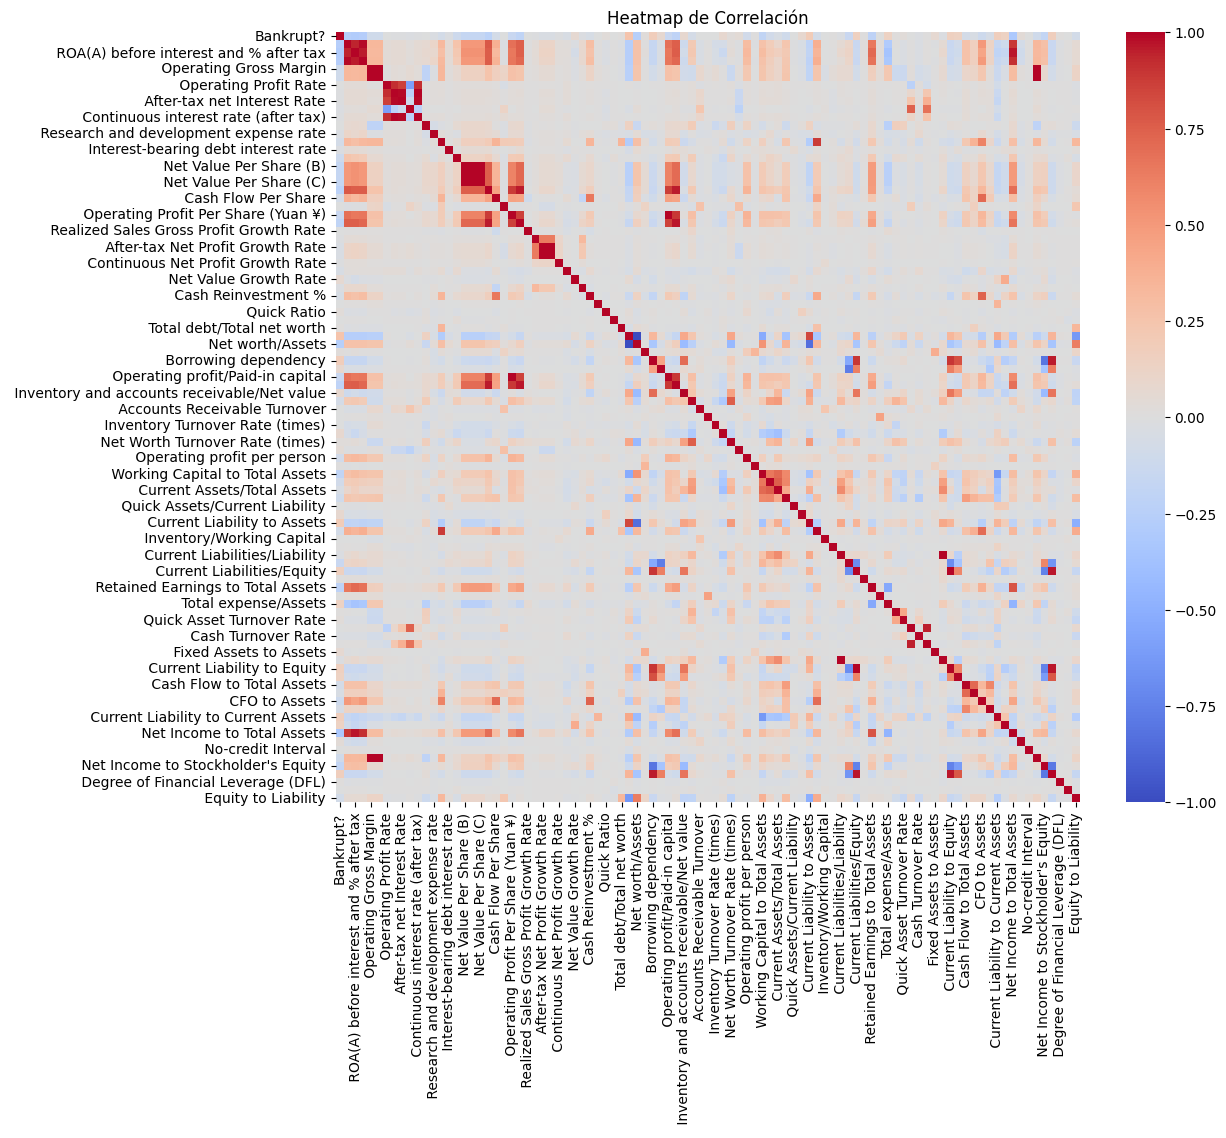

In [6]:
! pip install seaborn
import seaborn as sns

import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = data_reduced.corr()

# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap de Correlación')
plt.show()

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = data_reduced.corr()

# Obtener las correlaciones absolutas con respecto a la variable objetivo
correlation_with_target = correlation_matrix['Bankrupt?'].abs()

# Ordenar las correlaciones de mayor a menor
sorted_correlation = correlation_with_target.sort_values(ascending=False)

# Mostrar las variables con mayor y menor correlación
print("Variables con mayor correlación:")
print(sorted_correlation.head(10))

print("\nVariables con menor correlación:")
print(sorted_correlation.tail(10))


Variables con mayor correlación:
Bankrupt?                                                   1.000000
 Net Income to Total Assets                                 0.315457
 ROA(A) before interest and % after tax                     0.282941
 ROA(B) before interest and depreciation after tax          0.273051
 ROA(C) before interest and depreciation before interest    0.260807
 Net worth/Assets                                           0.250161
 Debt ratio %                                               0.250161
 Persistent EPS in the Last Four Seasons                    0.219560
 Retained Earnings to Total Assets                          0.217779
 Net profit before tax/Paid-in capital                      0.207857
Name: Bankrupt?, dtype: float64

Variables con menor correlación:
 Allocation rate per person                 0.002829
 Interest Expense Ratio                     0.002681
 Current Ratio                              0.002211
 Inventory/Working Capital                  0.001906

In [8]:
# Seleccionar las 10 variables más correlacionadas con la variable objetivo
top_features = sorted_correlation.head(10).index

# Crear un nuevo DataFrame con solo las variables seleccionadas
data_selected = data_reduced[top_features]
data_selected

,Bankrupt?,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital
0,1.0,0.716845,0.424389,0.405750,0.370594,0.792424,0.207576,0.169141,0.903225,0.137757
1,1.0,0.795297,0.538214,0.516730,0.464291,0.828824,0.171176,0.208944,0.931065,0.168962
2,1.0,0.774670,0.499019,0.472295,0.426071,0.792484,0.207516,0.180581,0.909903,0.148036
3,1.0,0.739555,0.451265,0.457733,0.399844,0.848535,0.151465,0.193722,0.906902,0.147561
4,1.0,0.795016,0.538432,0.522298,0.465022,0.893491,0.106509,0.212537,0.913850,0.167461
...,...,...,...,...,...,...,...,...,...,...
6814,0.0,0.799927,0.539468,0.543230,0.493687,0.875382,0.124618,0.216602,0.925611,0.171111
6815,0.0,0.799748,0.538269,0.524172,0.475162,0.900747,0.099253,0.216697,0.932629,0.171805
6816,0.0,0.797778,0.533744,0.520638,0.472725,0.961061,0.038939,0.210929,0.932000,0.172287
6817,0.0,0.811808,0.559911,0.554045,0.506264,0.913021,0.086979,0.228326,0.939613,0.182498


ANALISIS DE RANDOM FOREST CLASSIFIER

In [9]:
! pip install numpy
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Separar las características y la variable objetivo
X = data_reduced.drop(columns=['Bankrupt?'])
y = data_reduced['Bankrupt?']

# Entrenar un modelo RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Obtener la importancia de las características
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Seleccionar las 10 características más importantes
top_features_rf = feature_importances.nlargest(10).index

# Comparar con las características seleccionadas previamente
print("Características seleccionadas por correlación:")
print(top_features)

print("\nCaracterísticas seleccionadas por Random Forest:")
print(top_features_rf)


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\jsala\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Características seleccionadas por correlación:
Index(['Bankrupt?', ' Net Income to Total Assets',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' ROA(C) before interest and depreciation before interest',
       ' Net worth/Assets', ' Debt ratio %',
       ' Persistent EPS in the Last Four Seasons',
       ' Retained Earnings to Total Assets',
       ' Net profit before tax/Paid-in capital'],
      dtype='object')

Características seleccionadas por Random Forest:
Index([' Net Income to Stockholder's Equity',
       ' Persistent EPS in the Last Four Seasons', ' Net Value Growth Rate',
       ' Net profit before tax/Paid-in capital', ' Net Value Per Share (B)',
       ' Equity to Liability', ' Per Share Net profit before tax (Yuan ¥)',
       ' Degree of Financial Leverage (DFL)',
       ' Interest-bearing debt interest rate',
       ' Interest Coverage Ratio (Interest expense to EBIT)'],
      dtype='object')


In [10]:
# Crear un DataFrame para comparar las variables seleccionadas por ambos métodos
comparison_table = pd.DataFrame({
    'Correlation Method': top_features,
    'Random Forest Method': top_features_rf
})

# Mostrar la tabla
comparison_table

,Correlation Method,Random Forest Method
0,Bankrupt?,Net Income to Stockholder's Equity
1,Net Income to Total Assets,Persistent EPS in the Last Four Seasons
2,ROA(A) before interest and % after tax,Net Value Growth Rate
3,ROA(B) before interest and depreciation after...,Net profit before tax/Paid-in capital
4,ROA(C) before interest and depreciation befor...,Net Value Per Share (B)
5,Net worth/Assets,Equity to Liability
6,Debt ratio %,Per Share Net profit before tax (Yuan ¥)
7,Persistent EPS in the Last Four Seasons,Degree of Financial Leverage (DFL)
8,Retained Earnings to Total Assets,Interest-bearing debt interest rate
9,Net profit before tax/Paid-in capital,Interest Coverage Ratio (Interest expense to ...


In [11]:
# Crear un DataFrame con las variables seleccionadas por Random Forest y la variable target
data_rf_selected = data_reduced[top_features_rf.insert(0, 'Bankrupt?')]
data_rf_selected


,Bankrupt?,Net Income to Stockholder's Equity,Persistent EPS in the Last Four Seasons,Net Value Growth Rate,Net profit before tax/Paid-in capital,Net Value Per Share (B),Equity to Liability,Per Share Net profit before tax (Yuan ¥),Degree of Financial Leverage (DFL),Interest-bearing debt interest rate,Interest Coverage Ratio (Interest expense to EBIT)
0,1.0,0.827890,0.169141,0.000327,0.137757,0.147950,0.016469,0.138736,0.026601,7.250725e-04,0.564050
1,1.0,0.839969,0.208944,0.000443,0.168962,0.182251,0.020794,0.169918,0.264577,6.470647e-04,0.570175
2,1.0,0.836774,0.180581,0.000396,0.148036,0.177911,0.016474,0.142803,0.026555,7.900790e-04,0.563706
3,1.0,0.834697,0.193722,0.000382,0.147561,0.154187,0.023982,0.148603,0.026697,4.490449e-04,0.564663
4,1.0,0.839973,0.212537,0.000439,0.167461,0.167502,0.035490,0.168412,0.024752,6.860686e-04,0.575617
...,...,...,...,...,...,...,...,...,...,...,...
6814,0.0,0.840359,0.216602,0.000450,0.171111,0.175045,0.029890,0.172102,0.027064,1.790179e-04,0.566193
6815,0.0,0.840306,0.216697,0.000445,0.171805,0.181324,0.038284,0.172780,0.027009,2.370237e-04,0.566018
6816,0.0,0.840138,0.210929,0.000435,0.172287,0.269521,0.097649,0.173232,0.026791,0.000000e+00,0.565158
6817,0.0,0.841084,0.228326,0.000529,0.182498,0.213392,0.044009,0.185584,0.026822,2.110211e-04,0.565302


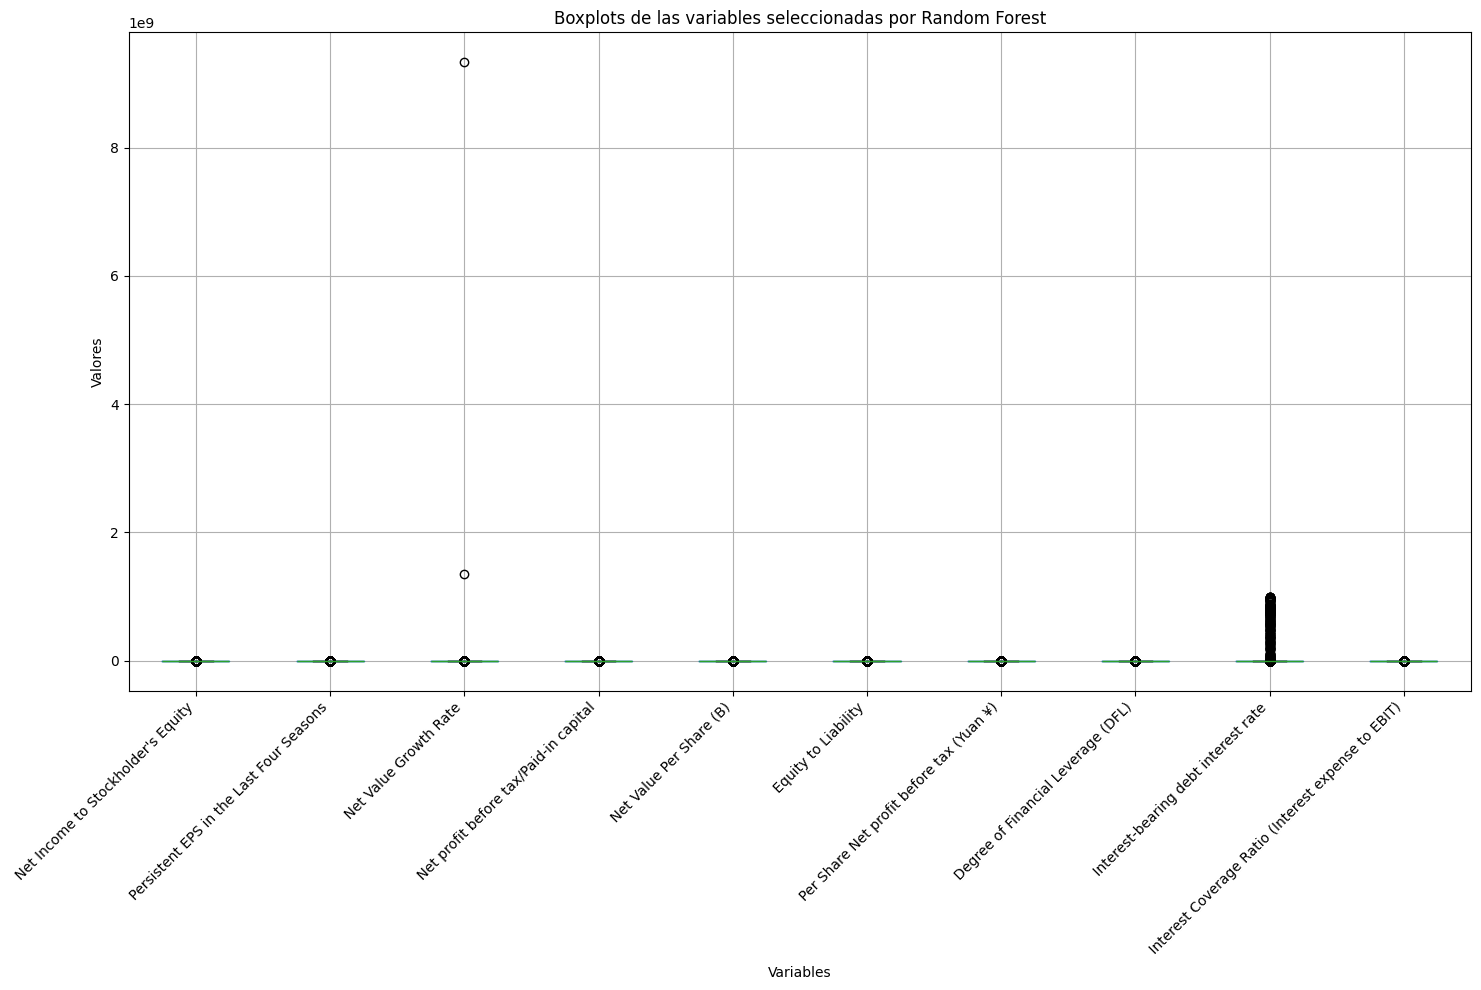

In [16]:
# Crear boxplots para cada columna del DataFrame
plt.figure(figsize=(15, 10))
data_rf_selected.drop(columns=['Bankrupt?']).boxplot(rot=90)
plt.title('Boxplots de las variables seleccionadas por Random Forest')
plt.ylabel('Valores')
plt.xlabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()